In [1]:
p

In [2]:
%matplotlib inline

In [3]:
connection = pymysql.connect(host='localhost', user='root', password='Sk1ttles', db='nba_stats_test')

In [20]:
player_pred_sql = """
       select pred.player_id,
       pred.name,
       pred.team,
       pred.game_date,
       points.pts,
       points.flag
from nba_stats_test.player_prediction_results as pred
inner join nba_stats_test.box_scores_map_view as map on ( (pred.team = map.team) and (str_to_date(pred.game_date, '%Y-%m-%d') = map.game_date) )
inner join (

    select player_id, game_date, pts, 'predicted' as flag
    from nba_stats_test.player_prediction_results

    union

    select b.player_id, m.game_date, b.pts, 'actual' as flag
    from nba_stats_test.basic_box_stats as b
    inner join box_scores_map_view as m on b.game_hash = m.game_hash

    ) as points on pred.player_id = points.player_id and map.game_date = points.game_date"""

In [21]:
player_pred_df = pd.read_sql(sql=player_pred_sql, con=connection, index_col=None)

In [62]:
player_pred_df.groupby(['team', 'game_date'])

In [63]:
sns.set_style('whitegrid')

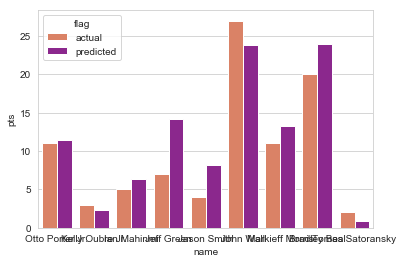

In [77]:
sns.barplot(x='name', y='pts', data=player_pred_df[player_pred_df['team'] == 'Washington Wizards'], hue='flag', palette='plasma_r')

In [33]:
### Pie chart of win and lose percentage for team in question

In [58]:
labels = 'lose_prob', 'win_prob'
content = pd.read_sql(sql='select lose_probability, win_probability from win_predictions_comparison_view where team like \'Los Angeles Lakers\'', con=connection, index_col=None).iloc[0]

In [84]:
colors = ['red', 'green']
explode = (.2, 0)

([<matplotlib.patches.Wedge at 0x10f7f10f0>,
 [Text(0.995681,-0.835834,'lose_prob'), Text(-0.8425,0.707244,'win_prob')],
 [Text(0.612727,-0.51436,'99.99327659607%'),
  Text(-0.459545,0.38577,'0.00672527822%')])

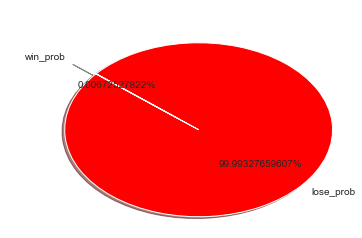

In [85]:
plt.pie(content, explode=explode, labels=labels, colors=colors,
        autopct='%1.11f%%', shadow=True, startangle=140)

In [86]:
### plotting r-squared over game_dates

In [88]:
sql = 'l'grbl

In [90]:
r_squared = pd.read_sql(sql=sql, con=connection, index_col=None)

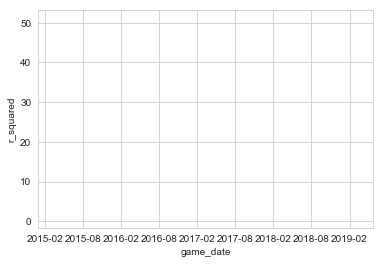

In [100]:
sns.lineplot(x='game_date', y='predicted_total_pts', data=r_squared[r_squared['team'] == 'Toronto'], color='red', legend='brief')
sns.lineplot(x='game_date', y='r_squared', data=r_squared[r_squared['team'] == 'Toronto'], color='blue', legend='brief')
